### Load Data and Check for Null Values

In [2]:
import pandas as pd

# Load the dataset
file_path = 'hour.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Check and drop records with NAs
data.dropna(inplace=True)


### Sanity Checks and  Dropping Unnecessary Columns

In [3]:
# Check if 'registered' + 'casual' = 'cnt'
data = data[data['registered'] + data['casual'] == data['cnt']]

# Ensure month values are 1-12
data = data[data['mnth'].between(1, 12)]

# Ensure hour values are 0-23
data = data[data['hr'].between(0, 23)]

# Drop redundant or unnecessary columns
inp1 = data.drop(columns=['casual', 'registered', 'instant', 'dteday'])


### Univariate Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe numerical fields
print(inp1.describe())

             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357    

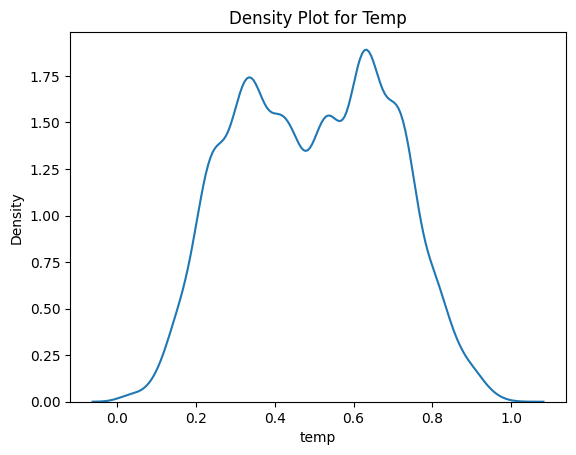

In [5]:
# Density plot for 'temp'
sns.kdeplot(inp1['temp'])
plt.title('Density Plot for Temp')
plt.show()


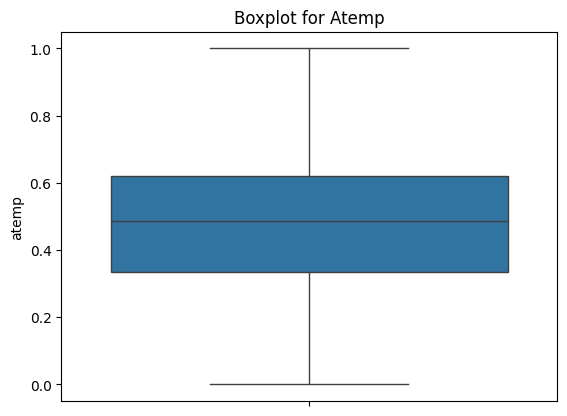

In [6]:
# Boxplot for 'atemp'
sns.boxplot(inp1['atemp'])
plt.title('Boxplot for Atemp')
plt.show()

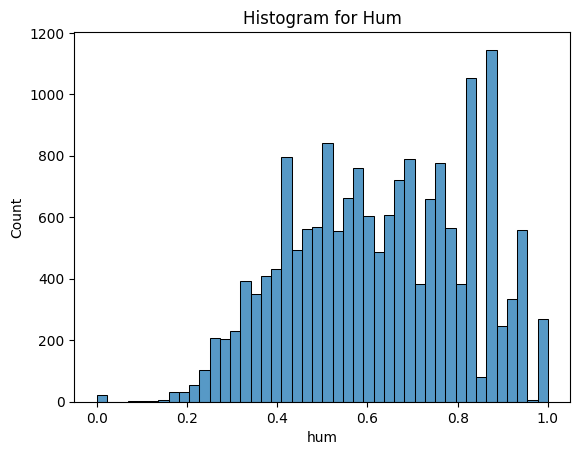

In [7]:
# Histogram for 'hum'
sns.histplot(inp1['hum'], kde=False)
plt.title('Histogram for Hum')
plt.show()

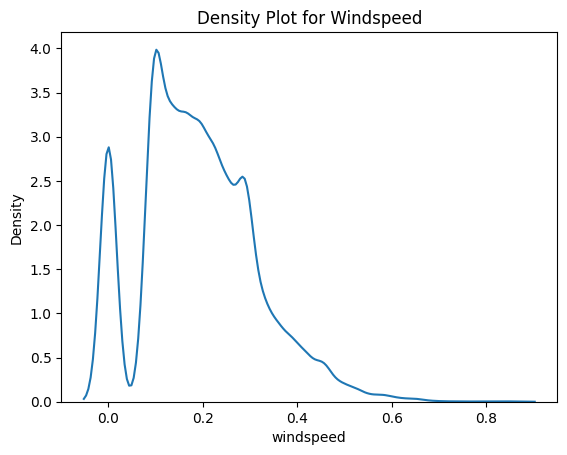

In [8]:
# Density plot for 'windspeed'
sns.kdeplot(inp1['windspeed'])
plt.title('Density Plot for Windspeed')
plt.show()

Text(0.5, 1.0, 'Boxplot for Cnt')

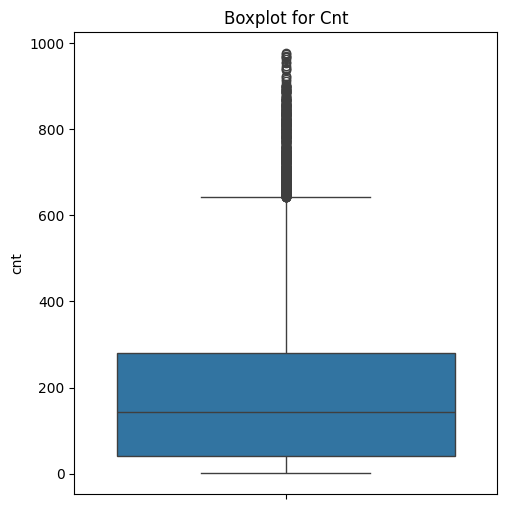

In [9]:
# Box and density plot for 'cnt'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(inp1['cnt'])
plt.title('Boxplot for Cnt')


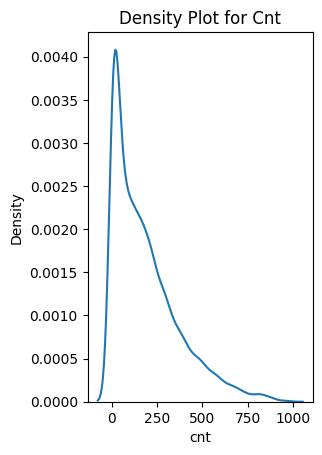

In [10]:
plt.subplot(1, 2, 2)
sns.kdeplot(inp1['cnt'])
plt.title('Density Plot for Cnt')
plt.show()

### Outlier Treatment

In [12]:
# Calculate percentiles for 'cnt'
percentiles = inp1['cnt'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).to_dict()
print("Percentiles for Cnt:")
print(percentiles)

# Decide on a cutoff percentile (e.g., 95th percentile)
cutoff = percentiles[0.95]

# Drop records above the cutoff
inp2 = inp1[inp1['cnt'] <= cutoff]


Percentiles for Cnt:
{0.1: 9.0, 0.25: 40.0, 0.5: 142.0, 0.75: 281.0, 0.9: 451.2000000000007, 0.95: 563.0999999999985, 0.99: 782.2200000000012}


### Bivariate Analysis

In [13]:
inp2 = pd.read_csv(file_path)

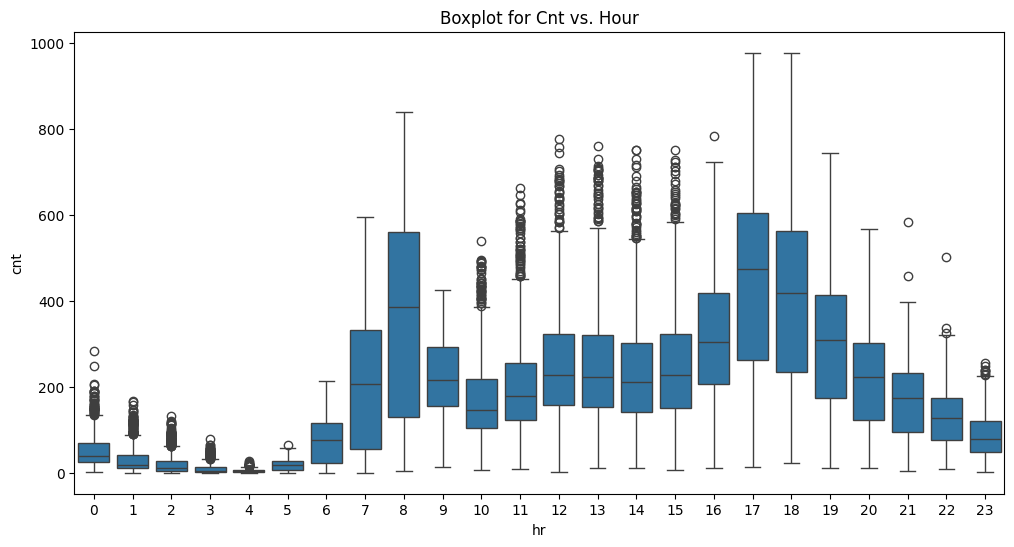

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=inp2)
plt.title('Boxplot for Cnt vs. Hour')
plt.show()


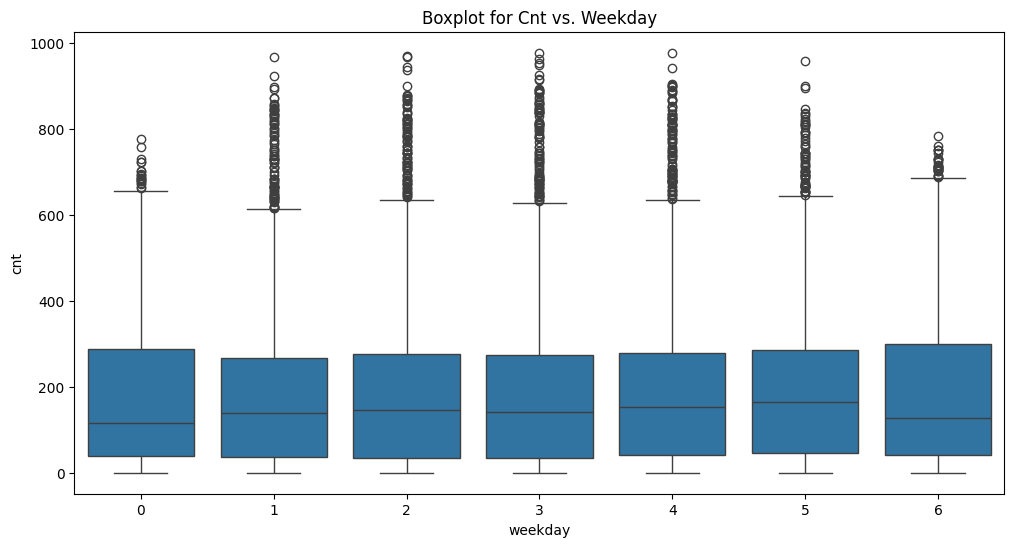

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=inp2)
plt.title('Boxplot for Cnt vs. Weekday')
plt.show()


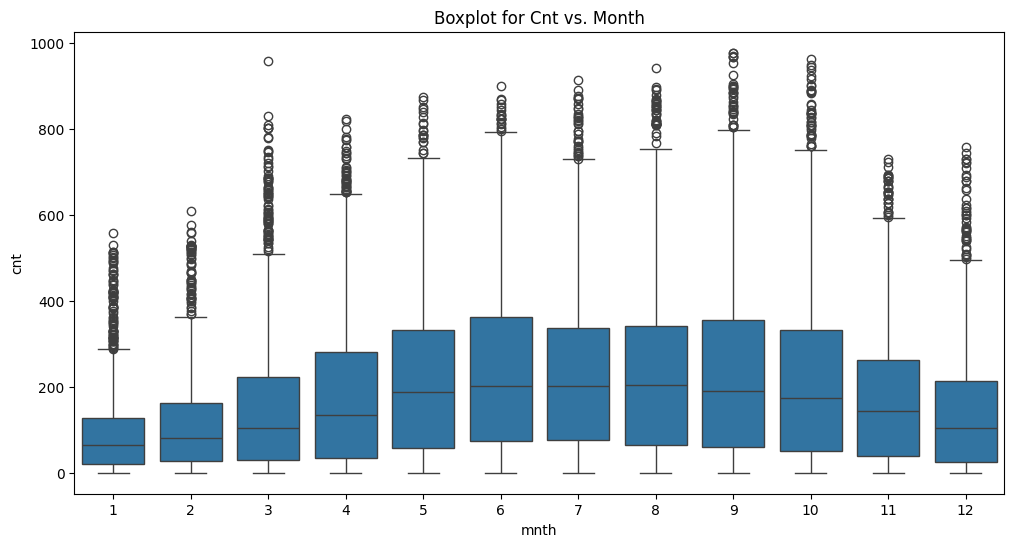

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=inp2)
plt.title('Boxplot for Cnt vs. Month')
plt.show()


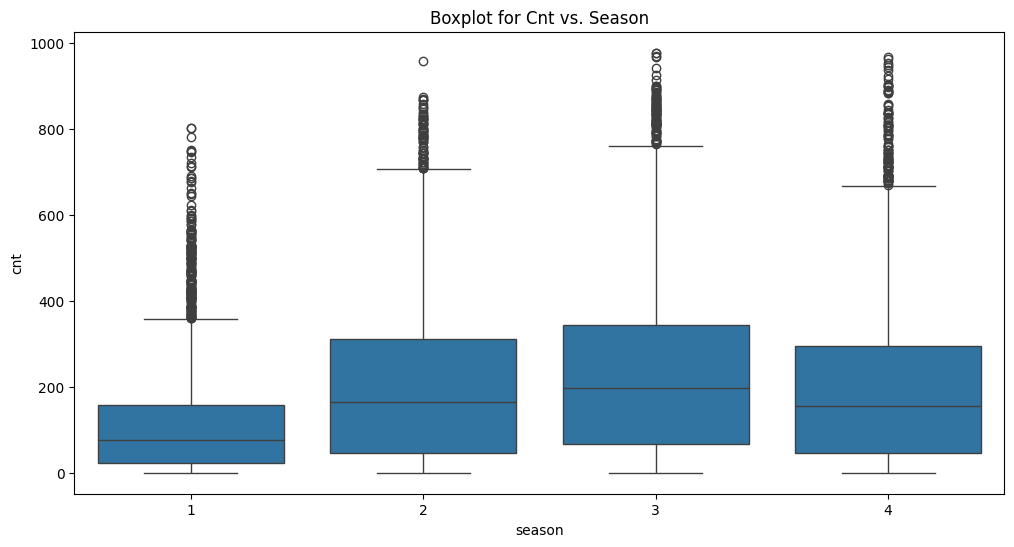

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=inp2)
plt.title('Boxplot for Cnt vs. Season')
plt.show()


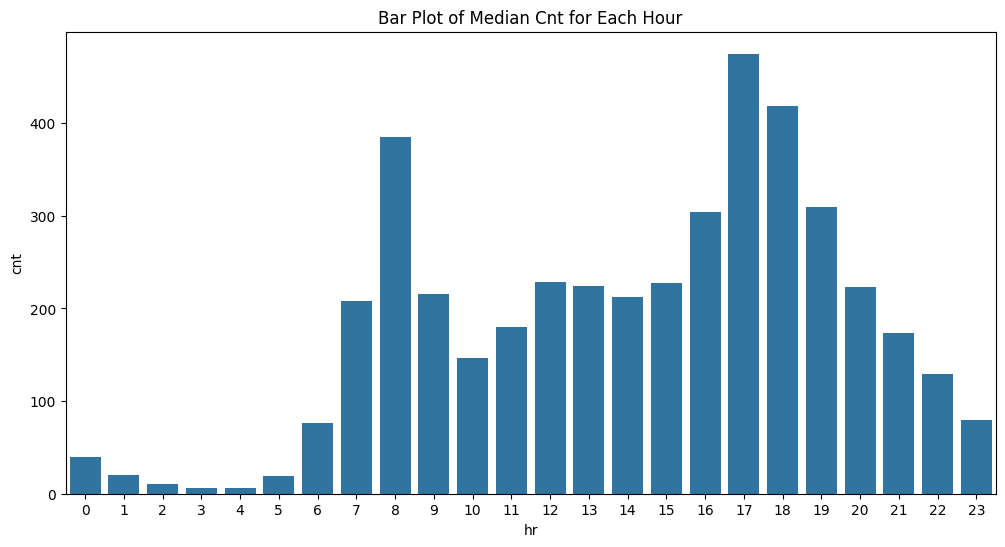

In [18]:
median_cnt_per_hour = inp2.groupby('hr')['cnt'].median().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=median_cnt_per_hour)
plt.title('Bar Plot of Median Cnt for Each Hour')
plt.show()


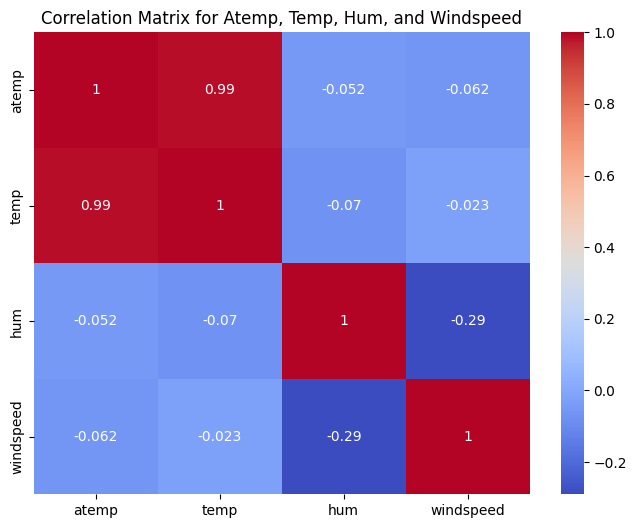

In [19]:
# Selecting variables
variables = ['atemp', 'temp', 'hum', 'windspeed']

# Creating the correlation matrix
corr_matrix = inp2[variables].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Atemp, Temp, Hum, and Windspeed')
plt.show()
